In [1]:
%pdb

Automatic pdb calling has been turned ON


In [1]:
import RSA_Code
import numpy as np
import random
import sys

import time
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

## Time Comparison for Prime Number Generator

In [3]:
simple_time = []
MR_time = []
bit_lengths = []

In [3]:
dat = np.loadtxt('png_data.csv', delimiter=',')

simple_time = dat[0]
MR_time = dat[1]
bit_lengths = dat[2]

In [8]:
t_all = time.time()

for n_sample in range(0, 100):
    
    d = random.randint(8, 65)

    print(str(d) + " bits")
    sys.stdout.flush()

    
    t_start = time.time()
    RSA_Code.random_prime(d = d, mode = 'simple')
#     np.append(simple_time, time.time() - t_start)
    simple_time.append(time.time() - t_start)

    t_start = time.time()
    RSA_Code.random_prime(d = d, mode = 'MR', k = 100)
#     np.append(MR_time, time.time() - t_start)
    MR_time.append(time.time() - t_start)
    
#     np.append(bit_lengths, d)
    bit_lengths.append(d)
    
    dat = np.asarray([bit_lengths, simple_time, MR_time])
    np.savetxt('png_data.csv', dat, delimiter=',')
    
print(time.time() - t_all)

48 bits
8 bits
44 bits
29 bits
31 bits
10 bits
62 bits
60 bits
10 bits
51 bits
62 bits
60 bits
11 bits
8 bits
55 bits
24 bits
32 bits
46 bits
8 bits
47 bits
28 bits
53 bits
14 bits
51 bits
37 bits
11 bits
35 bits
31 bits
11 bits
20 bits
10 bits
41 bits
58 bits
40 bits
30 bits
64 bits
31 bits
35 bits
60 bits
30 bits
65 bits
21 bits
50 bits
43 bits
20 bits
27 bits
16 bits
49 bits
21 bits
25 bits
43 bits
27 bits
19 bits
57 bits
23 bits
44 bits
37 bits
24 bits
59 bits
62 bits
42 bits
31 bits
32 bits
34 bits
61 bits
59 bits
35 bits
54 bits
21 bits
56 bits
13 bits
59 bits
52 bits
63 bits
24 bits
59 bits
23 bits
26 bits
41 bits
37 bits
63 bits
37 bits
48 bits
21 bits
37 bits
58 bits
60 bits
34 bits
13 bits
35 bits
50 bits
61 bits
61 bits
65 bits
49 bits
9 bits
39 bits
46 bits
31 bits
43 bits
1692.2834475040436


In [7]:
bit_lengths

[0.001661539077758789,
 0.003007650375366211,
 0.002975940704345703,
 0.003124237060546875,
 0.0006699562072753906,
 0.0014410018920898438,
 0.0007424354553222656,
 0.0006699562072753906,
 0.003654003143310547,
 0.002240896224975586,
 0.0005559921264648438,
 0.0021924972534179688,
 0.0027756690979003906,
 0.003499746322631836,
 0.0015072822570800781,
 0.002848386764526367,
 0.004198312759399414,
 0.0007848739624023438,
 0.001255035400390625,
 0.0018053054809570312,
 0.0023393630981445312,
 0.005730867385864258,
 0.0022454261779785156,
 0.000766754150390625,
 0.0016906261444091797,
 0.002274036407470703,
 0.004267215728759766,
 0.0008018016815185547,
 0.0013093948364257812,
 0.0018787384033203125,
 0.0021295547485351562,
 0.0019140243530273438,
 0.0035941600799560547,
 0.0036318302154541016,
 0.004091024398803711,
 0.002848386764526367,
 0.0028231143951416016,
 0.0008120536804199219,
 0.002738475799560547,
 0.003157377243041992,
 0.001997232437133789,
 0.0006887912750244141,
 0.00352358

In [ ]:
dat = np.loadtxt('png_data.csv', delimiter=',')

plt.plot(bit_lengths[-1000:], simple_time[-1000:], 'o')
plt.plot(bit_lengths[-1000:], MR_time[-1000:], 'o')

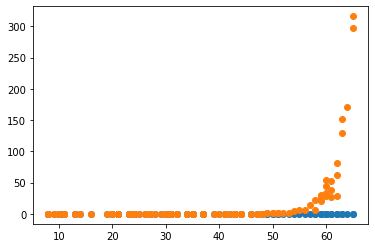

In [13]:
dat = np.loadtxt('png_data.csv', delimiter=',')

plt.plot(dat[0][-100:], dat[2][-100:], 'o')
plt.plot(dat[0][-100:], dat[1][-100:], 'o')


## Time Comparison for exponentiation operation

In [ ]:
normal_time = []
fast_time = []
fast_mod_time = []

for b in range(8, 1024):
    t_all = time.time()

    base = random.randint(2**(b-1), 2**b - 1)
    mod_base = random.randint(2**(b-1), 2**b - 1)
    power = random.randint(0, mod_base - 1)
    
#     t_start = time.time()
#     dummy = base ** power % mod_base
#     normal_time.append(time.time() - t_start)
    
    t_start = time.time()
    dummy = RSA_Code.fast_expontiation(base, power, 1) % mod_base
    fast_time.append(time.time() - t_start)
    
    t_start = time.time()
    dummy = RSA_Code.fast_expontiation(base, power, mod_base)
    fast_mod_time.append(time.time() - t_start)
    
    print(str(b) + ' bits: ' + str(time.time() - t_all))

print(time.time() = t_all)

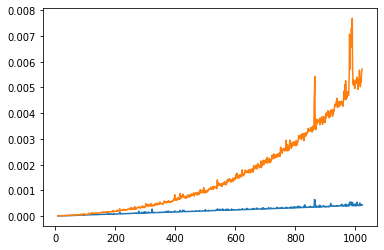

In [39]:
# plt.plot(np.arange(8, 24), normal_time)
plt.plot(np.arange(8, 1024), fast_time)
plt.plot(np.arange(8, 1024), fast_mod_time)

## CRT

In [11]:
normal_time = []
crt_time = []

t_all = time.time()
for n_sample in range(5, 500):
    
    sys.stdout.flush()
    
    b = n_sample
    
    
    p, q, n, phi_n, e, d = RSA_Code.key_generation(b)
    
    message = random.randint(n//2, n)

    
    cipher = RSA_Code.encryption(message, n, e)
    
    t_start = time.time()
    dummy = RSA_Code.decryption(cipher, n, d)
    normal_time.append(time.time() - t_start)
    
    t_start = time.time()
    dummy = RSA_Code.decryption_CRT(cipher, p, q, d)
    crt_time.append(time.time() - t_start)
    
print(time.time() - t_all)

49.099236726760864


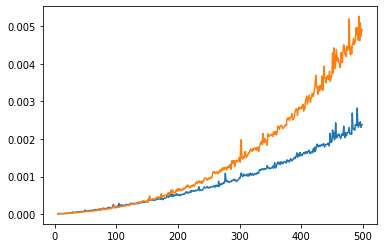

In [12]:
plt.plot(np.arange(5, 500), crt_time)
plt.plot(np.arange(5, 500), normal_time)